In [1]:
from google.colab import files
uploaded = files.upload()

Saving customer_churn.csv to customer_churn (3).csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("customer_churn.csv")

In [3]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3606,2623-DRYAM,Female,0,Yes,No,70,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,101.75,7069.3,No
6492,9548-LERKT,Male,0,Yes,No,24,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.75,483.15,No
3871,5299-SJCZT,Male,0,No,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),101.55,298.35,Yes
3932,1304-NECVQ,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.55,149.55,Yes
5650,6047-SUHPR,Male,0,Yes,Yes,39,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Electronic check,59.80,2343.85,No


In [4]:
df.drop('customerID', axis = 'columns', inplace = True)

In [5]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [8]:
df[pd.to_numeric(df['TotalCharges'], errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [9]:
df.iloc[488]['TotalCharges']

' '

In [10]:
df1 = df[df.TotalCharges!= ' ']

In [11]:
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
pd.to_numeric(df1.TotalCharges)

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-15-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [16]:
df1.TotalCharges.dtypes

dtype('float64')

In [17]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure

In [18]:
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

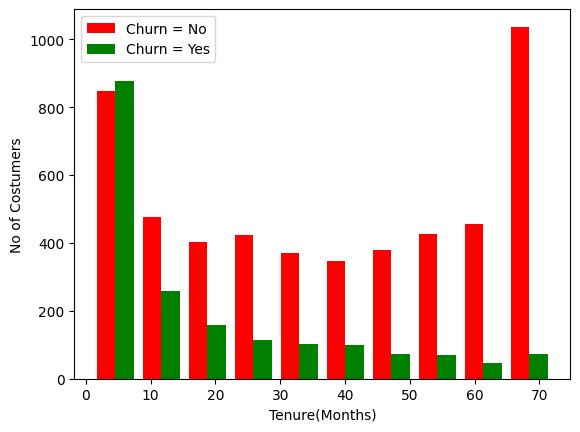

In [19]:
plt.hist([tenure_churn_no,tenure_churn_yes ], color = ['red', 'green'], label = ['Churn = No', 'Churn = Yes'])
plt.legend()
plt.xlabel('Tenure(Months)')
plt.ylabel('No of Costumers')
plt.show()

In [20]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

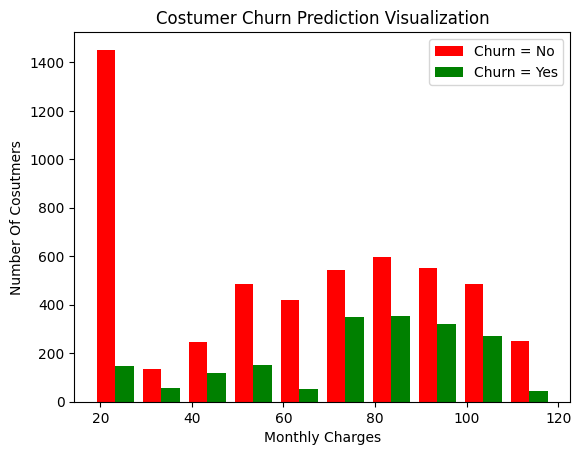

In [21]:
plt.xlabel('Monthly Charges')
plt.ylabel('Number Of Cosutmers')
plt.title('Costumer Churn Prediction Visualization')
plt.hist([mc_churn_no,mc_churn_yes ], color = ['red', 'green'], label = ['Churn = No', 'Churn = Yes'])
plt.legend()
plt.show()

In [22]:
def print_unique_col_values(df):
  for column in df:
      if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

In [23]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [24]:
df1.replace('No internet service','No', inplace = True)
df1.replace('No phone service','No', inplace = True)

<ipython-input-24-ef859c3c04aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace = True)
<ipython-input-24-ef859c3c04aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace = True)


In [25]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [26]:
yes_no_col = ['Partner', 'Dependents', 'PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

In [27]:
for col in yes_no_col:
    df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)

<ipython-input-27-d2693a453350>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace = True)


In [28]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [29]:
df1['gender'].replace({'Female': 1, 'Male' : 0}, inplace = True)

<ipython-input-29-93161814e34d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female': 1, 'Male' : 0}, inplace = True)


In [30]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [31]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract', 'PaymentMethod'])
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4365,0,0,1,0,63,1,1,0,0,1,...,True,False,False,False,False,True,False,True,False,False
6292,0,0,1,1,39,1,1,0,0,1,...,False,True,False,False,True,False,False,False,True,False
4381,1,1,0,0,49,1,1,0,0,1,...,False,True,False,True,False,False,False,True,False,False
2626,1,0,1,0,60,0,0,1,1,1,...,True,False,False,False,True,False,False,False,True,False
6224,0,0,1,1,51,1,1,0,1,0,...,False,True,False,False,True,False,True,False,False,False


In [32]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [33]:
cols_to_scale = ['tenure', "MonthlyCharges", 'TotalCharges']

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [37]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5359,1,1,0,0,0.126761,0,0,0,0,0,...,True,False,False,True,False,False,False,False,True,False
1792,0,0,1,1,0.577465,1,1,1,1,0,...,True,False,False,True,False,False,True,False,False,False
1959,1,0,1,1,0.056338,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
5291,1,0,1,0,0.943662,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
6761,0,0,0,0,0.000000,1,0,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [56]:
X = df2.drop('Churn', axis = 'columns')
y = df2['Churn']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [58]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
852,0,0,0,0,0.014085,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True
2127,0,0,1,0,0.549296,0,0,1,1,1,...,True,False,False,False,True,False,False,False,True,False
597,0,0,0,0,0.042254,1,1,0,0,0,...,True,False,False,True,False,False,False,False,False,True
206,0,0,1,1,1.000000,0,0,1,1,1,...,True,False,False,False,False,True,False,True,False,False
5014,0,1,1,0,0.985915,0,0,0,1,1,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,0,0,0,0,0.211268,1,0,0,0,0,...,False,True,False,True,False,False,False,True,False,False
5704,1,0,1,0,0.253521,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
1366,0,0,1,0,0.126761,1,1,0,0,0,...,False,True,False,True,False,False,False,False,True,False
1552,1,0,1,1,0.422535,1,1,0,1,0,...,True,False,False,False,False,True,True,False,False,False


In [59]:
X_train.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                     float64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No                            bool
Contract_Month-to-month        

In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
X_train = X_train.astype('float32')
y_train = y_train.astype('int32')
X_test = X_test.astype('float32')
y_test = y_test.astype('int32')


In [62]:
model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=500)

Epoch 1/500
176/176 [==============================] - 1s 2ms/step - loss: 0.5241 - accuracy: 0.7252
Epoch 2/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.7787
Epoch 3/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4284 - accuracy: 0.7906
Epoch 4/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.7925
Epoch 5/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4206 - accuracy: 0.7970
Epoch 6/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4193 - accuracy: 0.7977
Epoch 7/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.7975
Epoch 8/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4154 - accuracy: 0.8034
Epoch 9/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4142 - accuracy: 0.8034
Epoch 10/500
176/176 [==============================] - 0s 2ms/step - loss: 0.4123 - accura

In [63]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.8629 - accuracy: 0.7619


[0.8628919720649719, 0.761904776096344]

In [67]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[7.8277910e-05],
       [5.5949230e-02],
       [2.1942379e-01],
       [4.9074307e-01],
       [5.7928468e-05]], dtype=float32)

In [69]:
y_pred = []
for element in yp:
    if element > .5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [72]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[892, 160],
       [175, 180]])

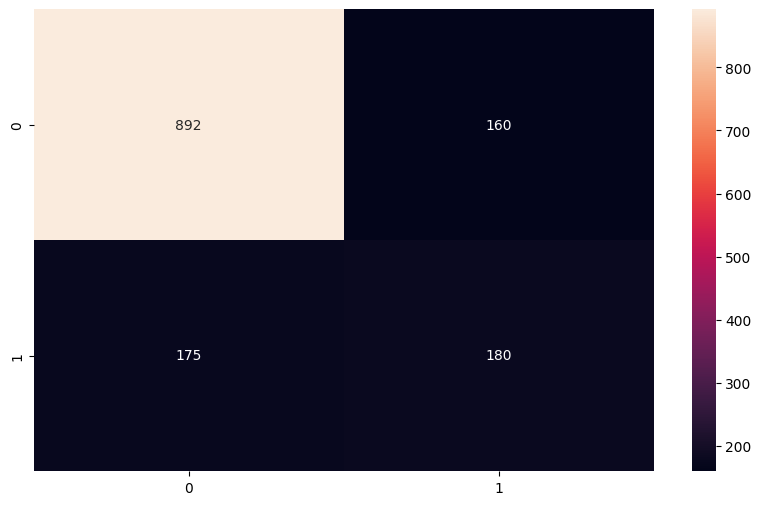

In [78]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot = True, fmt='d')
plt.show()